In [91]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [3]:
df = pd.read_pickle('../data/trig_2019-10-17 00:00:00_2020-03-01 00:00:00.pkl')

In [23]:
time_diff_s = (df.ti - df.tt) / 1000

In [74]:
time_diff_s.to_pickle('../data/myshake_network_latency_20191017_20200301.pkl')

In [71]:
max_v = 0
for i in range(80):
    c = np.random.choice(time_diff_s)
    if c > max_v:
        max_v = c

In [115]:
distribution = time_diff_s.describe(percentiles=list(np.arange(0, 1, 0.1))+[0.95])

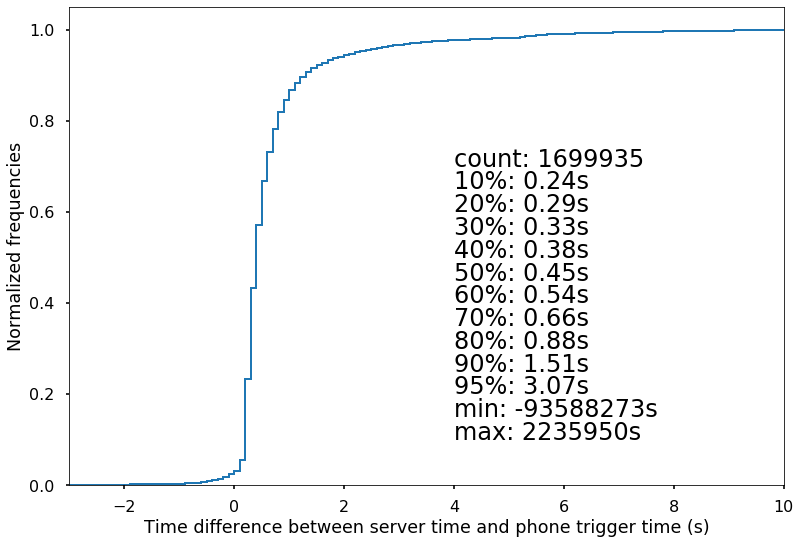

In [118]:
plt.hist(time_diff_s, cumulative=True, density=True, bins=np.arange(-5, 11, 0.1), 
        histtype='step', linewidth=2)
plt.xlim(-3, 10)
plt.xlabel('Time difference between server time and phone trigger time (s)')
plt.ylabel('Normalized frequencies')
plt.text(4, 0.7, f'count: {int(distribution["count"])}', fontsize=24)
for i, key in enumerate(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '95%']):
    plt.text(4, 0.65 - 0.05*i, f'{key}: {distribution[key]:.2f}s', fontsize=24)
plt.text(4, 0.65 - 0.05*(i+1), f'min: {int(distribution["min"])}s', fontsize=24)
plt.text(4, 0.65 - 0.05*(i+2), f'max: {int(distribution["max"])}s', fontsize=24)
plt.show()